In [1]:
import pandas as pd
import tcc_utils
import tratamento_dados_empresa
from keras.initializers import glorot_normal as gl_normal, glorot_uniform as gl_uni, RandomUniform as rnd_uni
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

x_csv_path = '../data/grendene-indicadores-financeiros-raw.csv'
y_csv_path = '../data/grendene-cotacao-raw.csv'

X = tratamento_dados_empresa.treat_economatica_indicadores_financeiros(x_csv_path)

# Spliting test / train and Feature Scaling
x_train, x_test, y_train, y_test, x_scaler, y_scaler = tratamento_dados_empresa. \
    get_scaled_splits_and_scaler(x_csv_path, y_csv_path, 0.2, 0)

number_hidden_layer = round(x_train.shape[1]*1.5)

Using TensorFlow backend.


### Using all components: 56

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 84)                4788      
_________________________________________________________________
dense_2 (Dense)              (None, 84)                7140      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 85        
Total params: 12,013
Trainable params: 12,013
Non-trainable params: 0
_________________________________________________________________
None


<Figure size 576x432 with 0 Axes>

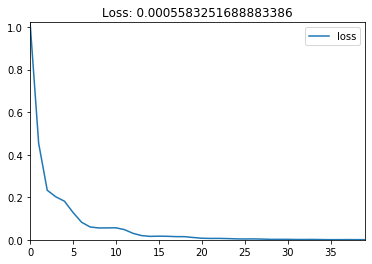

MSE of training: 0.0005189152831338685
MSE of testing: 0.11903221160173416
    Prediction      Real     % error
8     7.412485  8.491036   12.702235
0     6.800924  8.075241   15.780546
7     5.449959  5.156991    5.680991
9     4.138104  4.785659   13.531154
2     5.283332  4.616062   14.455396
1     2.983624  3.669486   18.690941
6     3.882536  3.491649   11.194912
3     2.805845  3.003443    6.579070
10    1.205886  1.377930   12.485715
5     2.293953  0.900556  154.726178
4    -0.660122  0.667981  198.823511


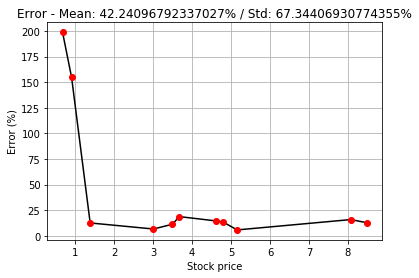

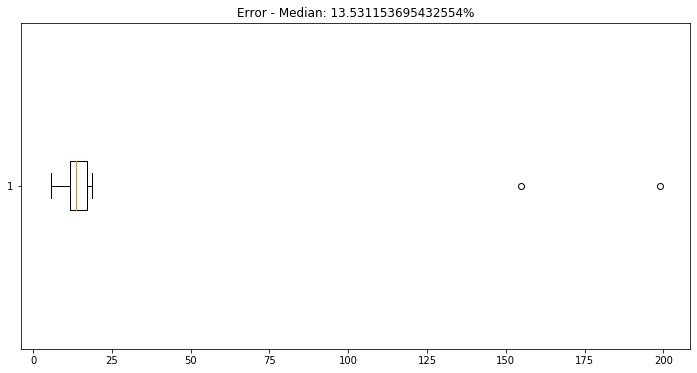

count     11.000000
mean      42.240968
std       67.344069
min        5.680991
25%       11.840313
50%       13.531154
75%       17.235743
max      198.823511
Name: % error, dtype: float64
Execution time
CPU times: user 1.2 s, sys: 89.7 ms, total: 1.29 s
Wall time: 1.53 s


In [2]:
%%time

# Keras Initializer with seed
glorot_normal = gl_normal(seed=0)
# Neural Network layers
layers = [number_hidden_layer, number_hidden_layer]
activations = ['relu', 'relu']
# Create model
deep_model = tcc_utils.deep_model(x_train, glorot_normal, layers, activations)
# Fit model
deep_history = deep_model.fit(x_train, y_train, epochs=40, verbose=0)
# Evaluating model
tcc_utils.evaluate_model(deep_model, deep_history, x_train, y_train,
                         x_test, y_test, X, y_scaler)

print('Execution time')

### Using PCA to diminish number of components

- Retaining 95% of variance

In [3]:
from sklearn.decomposition import PCA

# Spliting test / train and Feature Scaling
x_train, x_test, y_train, y_test, x_scaler, y_scaler = tratamento_dados_empresa. \
    get_scaled_splits_and_scaler(x_csv_path, y_csv_path, 0.2, 0)

pca = PCA(.99)

pca_fit = pca.fit(x_train)

x_train = pca_fit.transform(x_train)
x_test = pca_fit.transform(x_test)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 84)                1344      
_________________________________________________________________
dense_8 (Dense)              (None, 84)                7140      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 85        
Total params: 8,569
Trainable params: 8,569
Non-trainable params: 0
_________________________________________________________________
None


<Figure size 576x432 with 0 Axes>

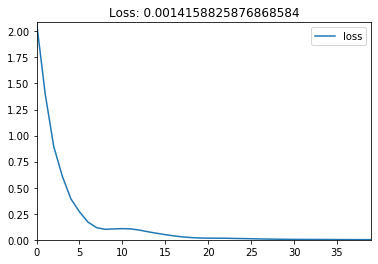

MSE of training: 0.0012796026421710849
MSE of testing: 0.15088647603988647
    Prediction      Real     % error
8     7.074720  8.491036   16.680132
0     7.635088  8.075241    5.450642
7     5.818492  5.156991   12.827274
9     4.026972  4.785659   15.853335
2     4.309136  4.616062    6.649084
1     3.453614  3.669486    5.882879
6     4.843303  3.491649   38.711059
3     4.502101  3.003443   49.897990
10    1.015761  1.377930   26.283580
5     2.091710  0.900556  132.268658
4    -0.487504  0.667981  172.981697


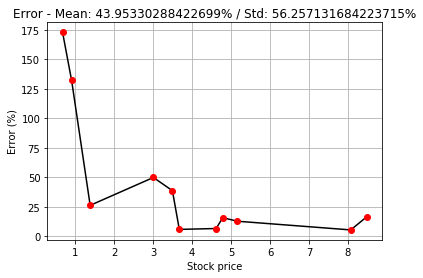

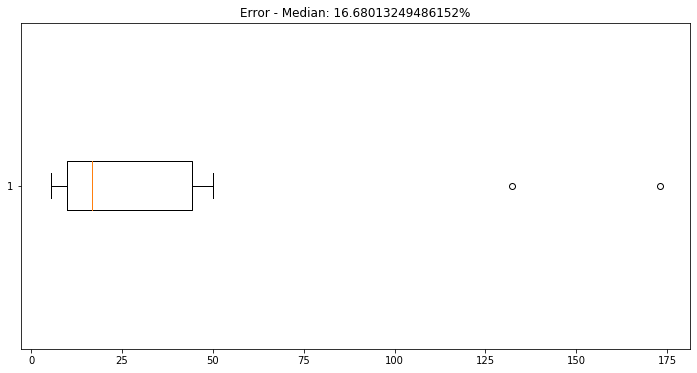

count     11.000000
mean      43.953303
std       56.257132
min        5.450642
25%        9.738179
50%       16.680132
75%       44.304525
max      172.981697
Name: % error, dtype: float64

Number of components: 15
Total variance: 0.9905849416387831
Components variance: [0.4778865  0.13633429 0.10887248 0.08643586 0.05394653 0.02904865
 0.023187   0.0197496  0.01548884 0.01088649 0.00789595 0.00669141
 0.00567169 0.00452512 0.00396454]

Execution time
CPU times: user 1.33 s, sys: 63.5 ms, total: 1.39 s
Wall time: 1.56 s


In [5]:
%%time

# Keras Initializer with seed
glorot_normal = gl_normal(seed=0)
# Neural Network layers
layers = [number_hidden_layer, number_hidden_layer]
activations = ['relu', 'relu']
# Create model
deep_model = tcc_utils.deep_model(x_train, glorot_normal, layers, activations)
# Fit model
deep_history = deep_model.fit(x_train, y_train, epochs=40, verbose=0)
# Evaluating model
tcc_utils.evaluate_model(deep_model, deep_history, x_train, y_train,
                         x_test, y_test, X, y_scaler)

print('')
print(f'Number of components: {pca_fit.n_components_}')
print(f'Total variance: {pca_fit.explained_variance_ratio_.sum()}')
print(f'Components variance: {pca_fit.explained_variance_ratio_}')
print('')
print('Execution time')